# Sentiment Analysis for Financial News

In [13]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

k=KNeighborsClassifier()
d=DecisionTreeClassifier()
r=RandomForestClassifier()
l=LogisticRegression()
mb=MultinomialNB()
    
from sklearn.model_selection import train_test_split

from wordcloud import WordCloud, STOPWORDS
from PIL import Image

from textblob import TextBlob

import warnings
warnings.filterwarnings('ignore')  

In [3]:
df=pd.read_csv("all-data.csv",encoding="iso-8859-1")#https://www.kaggle.com/datasets/ankurzing/sentiment-analysis-for-financial-news

In [18]:
df

,neutral,text
0,2,technopolis plans to develop in stages an area...
1,0,the international electronic industry company ...
2,1,with the new production plant the company woul...
3,1,according to the company s updated strategy fo...
4,1,financing of aspocomp s growth aspocomp is agg...
...,...,...
4840,0,london marketwatch share prices ended lower i...
4841,2,rinkuskiai s beer sales fell by per cent to ...
4842,0,operating profit fell to eur mn from eur mn ...
4843,0,net sales of the paper segment decreased to eu...


In [5]:
df["neutral"].value_counts()

neutral     2878
positive    1363
negative     604
Name: neutral, dtype: int64

In [6]:
df.rename(columns ={'According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .':'text'},inplace=True)
#We are changing the name of the column.

In [8]:
df["text"]=df["text"].str.lower() #We convert our texts to lowercase.
df["text"]=df["text"].str.replace("[^\w\s]","") #We remove punctuation marks from our texts.
df["text"]=df["text"].str.replace("\d+","") #We are removing numbers from our texts.
df["text"]=df["text"].str.replace("\n","").replace("\r","") #We remove spaces in our texts.
df_neutral=df[df['neutral']=="neutral"]
df_positive=df[df['neutral']=="positive"]
df_negative=df[df['neutral']=="negative"]
df["neutral"]=df["neutral"].map({"positive":1,"negative":0,"neutral":2})
df['neutral']=df['neutral'].astype(int)
df1=df[df['neutral']!=2]
#We divide it into positive and negative.

In [10]:
vect=CountVectorizer(lowercase=True,stop_words="english")
x=df1.text
y=df1.neutral
x=vect.fit_transform(x)

In [11]:
def sentiment_classification_funct(x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=60)
    
    print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
    
    k=KNeighborsClassifier()
    d=DecisionTreeClassifier()
    r=RandomForestClassifier()
    l=LogisticRegression()
    mb=MultinomialNB()
    
    algos=[k,d,r,l,mb]
    algo_names=['KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','MultinomialNB']
    
    accuracy_scored=[]
    precision_scored=[]
    recall_scored=[]
    f1_scored=[]
    
    for item in algos:
        item.fit(x_train,y_train)
        accuracy_scored.append(accuracy_score(y_test,item.predict(x_test)))
        precision_scored.append(precision_score(y_test,item.predict(x_test)))
        recall_scored.append(recall_score(y_test,item.predict(x_test)))
        f1_scored.append(f1_score(y_test,item.predict(x_test)))
        
    result=pd.DataFrame(columns=['f1_score','recall_score','precision_score','accuracy_score'],index=algo_names)
    result.f1_score=f1_scored
    result.recall_score=recall_scored
    result.precision_score=precision_scored
    result.accuracy_score=accuracy_scored
    sentiment_classification_funct.result=result.sort_values('f1_score',ascending=False)
    return result.sort_values('f1_score',ascending=False)

In [12]:
sentiment_classification_funct(x,y)

(1573, 4847) (394, 4847) (1573,) (394,)


,f1_score,recall_score,precision_score,accuracy_score
LogisticRegression,0.879859,0.946768,0.821782,0.827411
RandomForestClassifier,0.872600,0.950570,0.806452,0.814721
MultinomialNB,0.860377,0.866920,0.853933,0.812183
DecisionTreeClassifier,0.860335,0.878327,0.843066,0.809645
KNeighborsClassifier,0.799302,0.870722,0.738710,0.708122


In [19]:
def wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    mask=np.array(Image.open("Stock Market.png"))
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS,mask=mask)
    wc.generate(" ".join(data))
    plt.imshow(wc)
    plt.axis("off")
#We draw the most used words in texts on a picture.

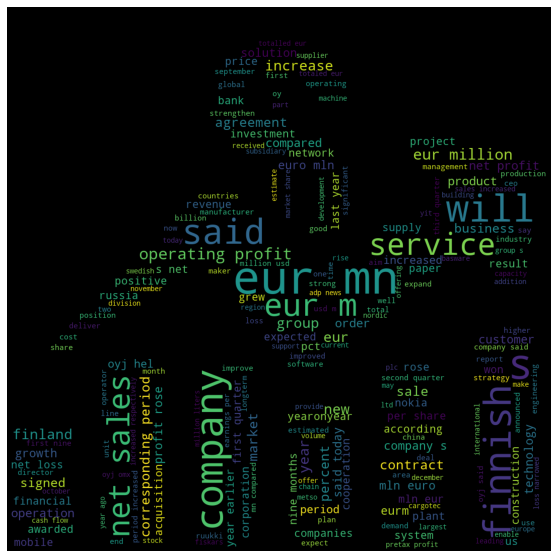

In [21]:
wc(df_positive.text,"black")##Positive

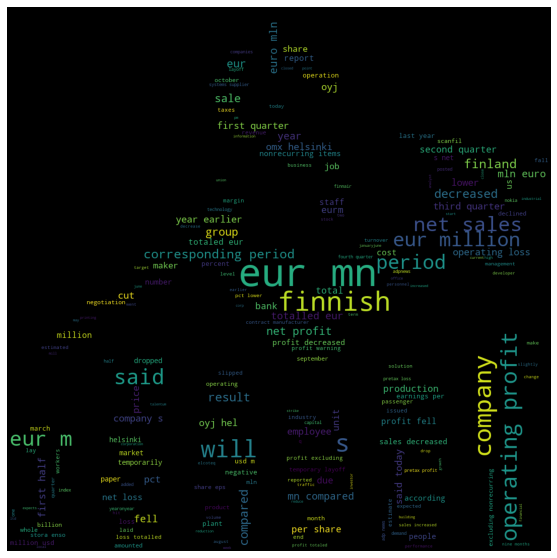

In [22]:
wc(df_negative.text,"black")##Negative

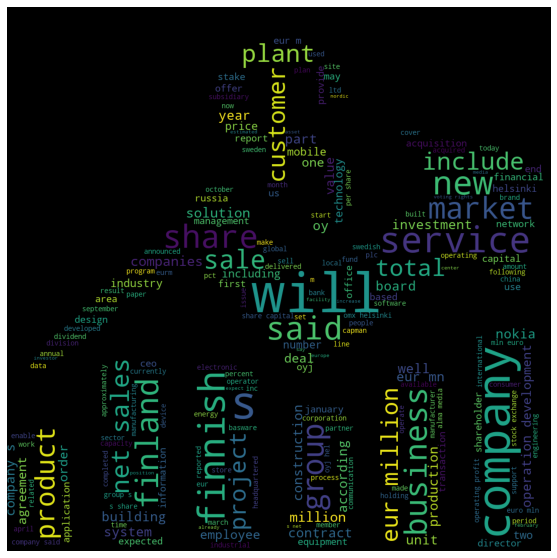

In [23]:
wc(df_neutral.text,"black")##Neutral

In [24]:
sent=df[["neutral","text"]]

In [25]:
def detect_sentiment(text):
    return TextBlob(text).sentiment.polarity
#We are doing our sentiment analysis.

In [26]:
sent["sentiment"]=sent["text"].apply(detect_sentiment)
sent.head()

,neutral,text,sentiment
0,2,technopolis plans to develop in stages an area...,0.083333
1,0,the international electronic industry company ...,0.000000
2,1,with the new production plant the company woul...,-0.064802
3,1,according to the company s updated strategy fo...,0.000000
4,1,financing of aspocomp s growth aspocomp is agg...,0.500000


In [27]:
def sentiment2(sent):
    if (sent< -0.02):
        return 3
    elif sent>0.02:
        return 1
    else:
        return 0
#We divide the texts into three groups positive, negative and nötr.

In [28]:
sent["sent"]=sent["sentiment"].apply(sentiment2)
sent.head()

,neutral,text,sentiment,sent
0,2,technopolis plans to develop in stages an area...,0.083333,1
1,0,the international electronic industry company ...,0.000000,0
2,1,with the new production plant the company woul...,-0.064802,3
3,1,according to the company s updated strategy fo...,0.000000,0
4,1,financing of aspocomp s growth aspocomp is agg...,0.500000,1


In [30]:
sent.sentiment.value_counts()

0.000000    2467
0.100000     103
0.250000     101
0.136364      96
0.500000      79
            ... 
0.102652       1
0.280000       1
0.186667       1
0.533333       1
0.112662       1
Name: sentiment, Length: 494, dtype: int64